# WeatherPy

### Analysis
- As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
- There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
- There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

os.chdir('D:\\2019 Spring Baruch\\Columbia Engineering\\Homework\\homework-vy-nguyen\\hwk-week-6')
os.getcwd()

'D:\\2019 Spring Baruch\\Columbia Engineering\\Homework\\homework-vy-nguyen\\hwk-week-6'

In [22]:
%notebook "WeatherPy.ipynb"

In [3]:
from config import api_key
from citipy import citipy
output_data_file = 'hwk-week-6/cities.csv'
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [4]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

630

### Perform API Calls
- Perform a weather check on each of the cities using a series of successive API calls
- Include a print log of each city as it's being processed with the city number and city name

In [5]:
params = {'q': 'London',
          'APPID': api_key,
          'units': 'imperial'}

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
request = requests.get(base_url, params=params)

request.json()

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'},
  {'id': 310,
   'main': 'Drizzle',
   'description': 'light intensity drizzle rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 50.95,
  'pressure': 991,
  'humidity': 71,
  'temp_min': 48.99,
  'temp_max': 53.6},
 'visibility': 10000,
 'wind': {'speed': 25.28, 'deg': 230},
 'rain': {'1h': 0.79},
 'clouds': {'all': 75},
 'dt': 1551640579,
 'sys': {'type': 1,
  'id': 1502,
  'message': 0.0206,
  'country': 'GB',
  'sunrise': 1551595225,
  'sunset': 1551635107},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
city_json = []
for city in cities:
    params = {'q': city,
             'APPID': api_key,
             'units': 'imperial'}
    index = cities.index(city) + 1
    try:
        print('Processing Record {} of Set {}'.format(city, index))
        request = requests.get(base_url, params=params)
        city_json.append(request.json())
        time.sleep(0.5)
    except:
        print('City: {} is not available. Moving on...'.format(city))

Processing Record cabo san lucas of Set 1
Processing Record barentsburg of Set 2
Processing Record kapaa of Set 3
Processing Record atuona of Set 4
Processing Record khatanga of Set 5
Processing Record bathurst of Set 6
Processing Record tiksi of Set 7
Processing Record nikolskoye of Set 8
Processing Record kroya of Set 9
Processing Record pevek of Set 10
Processing Record butaritari of Set 11
Processing Record sarangani of Set 12
Processing Record taolanaro of Set 13
Processing Record avarua of Set 14
Processing Record odessa of Set 15
Processing Record laguna of Set 16
Processing Record bredasdorp of Set 17
Processing Record saint-philippe of Set 18
Processing Record rikitea of Set 19
Processing Record monforte de lemos of Set 20
Processing Record qaanaaq of Set 21
Processing Record upernavik of Set 22
Processing Record busselton of Set 23
Processing Record appleton of Set 24
Processing Record currais novos of Set 25
Processing Record mayo of Set 26
Processing Record bluff of Set 27


### Convert Raw Data to DataFrame
- Export city data into a csv file
- Display DataFrame

In [7]:
cities_to_append=[]
err_count = 0
for city in city_json:
    try:
        city_to_append = {'City': city['name'],
                          'Cloudiness': city['clouds']['all'],
                          'Country': city['sys']['country'],
                          'Date': city['dt'],
                          'Humidity': city['main']['humidity'],
                          'Lat': city['coord']['lat'],
                          'Lng': city['coord']['lon'],
                          'Max Temp': city['main']['temp_max'],
                          'Wind Speed': city['wind']['speed'] 
                           }
        
        cities_to_append.append(city_to_append)
    except:
        err_count += 1
df_city = pd.DataFrame(cities_to_append)
df_city.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [9]:
df_city.to_csv('weather_by_city.csv', index=False)
df_city.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1551640660,50,22.89,-109.91,89.60,10.29
1,Kapaa,75,US,1551640527,60,22.08,-159.32,71.60,17.22
2,Atuona,88,PF,1551640773,100,-9.80,-139.03,80.76,11.88
3,Khatanga,12,RU,1551640884,62,71.98,102.47,3.99,17.25
4,Bathurst,0,AU,1551640809,71,-33.42,149.58,61.00,2.15


### Plot the Data
- Latitude vs. Temperature Plot
- Latitude vs. Humidity Plot
- Latitude vs. Cloudiness Plot
- Latitude vs. Wind Speed Plot

#### Latitude vs. Temperature Plot

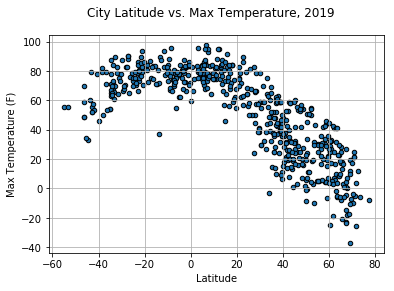

In [11]:
df_city.plot.scatter('Lat','Max Temp', grid=True, edgecolor='black')

plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.suptitle('City Latitude vs. Max Temperature, 2019')

plt.savefig('city_latitude_v_max_temp.png')

plt.show()

#### Latitude vs. Humidity Plot

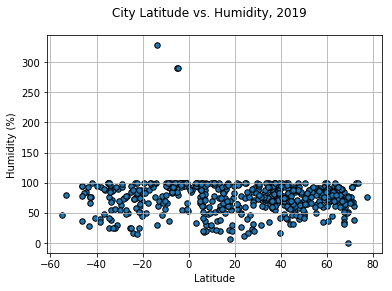

In [19]:
df_city.plot.scatter('Lat','Humidity', grid=True, s=30, edgecolor='black')

plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.suptitle('City Latitude vs. Humidity, 2019')

plt.savefig('city_latitude_v_humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

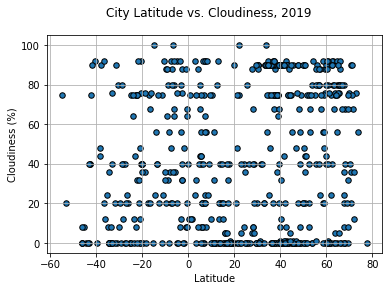

In [18]:
df_city.plot.scatter('Lat','Cloudiness', grid=True, s=30, edgecolor='black')

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.suptitle('City Latitude vs. Cloudiness, 2019')

plt.savefig('city_latitude_v_cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

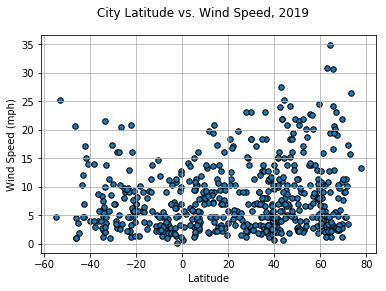

In [20]:
df_city.plot.scatter('Lat','Wind Speed', grid=True, s=30, edgecolor='black')

plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.suptitle('City Latitude vs. Wind Speed, 2019')

plt.savefig('city_latitude_v_wind_speed.png')

plt.show()